In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train 데이터 확인

In [3]:
train = pd.read_csv('/kaggle/input/DontGetKicked/training.csv')
train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

변수 카테로리 정리

In [5]:
train.select_dtypes(include='object').columns

Index(['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST'],
      dtype='object')

In [6]:
train.select_dtypes(include='int').columns

Index(['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'VehOdo', 'BYRNO',
       'VNZIP1', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [7]:
train.select_dtypes(include='float').columns

Index(['WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost'],
      dtype='object')

int, float형 변수 상관관계 확인

In [8]:
heatmap_int = train[['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'VehOdo', 'BYRNO',
       'VNZIP1', 'IsOnlineSale', 'WarrantyCost']]
heatmap_float = train[['WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost']]

<AxesSubplot:>

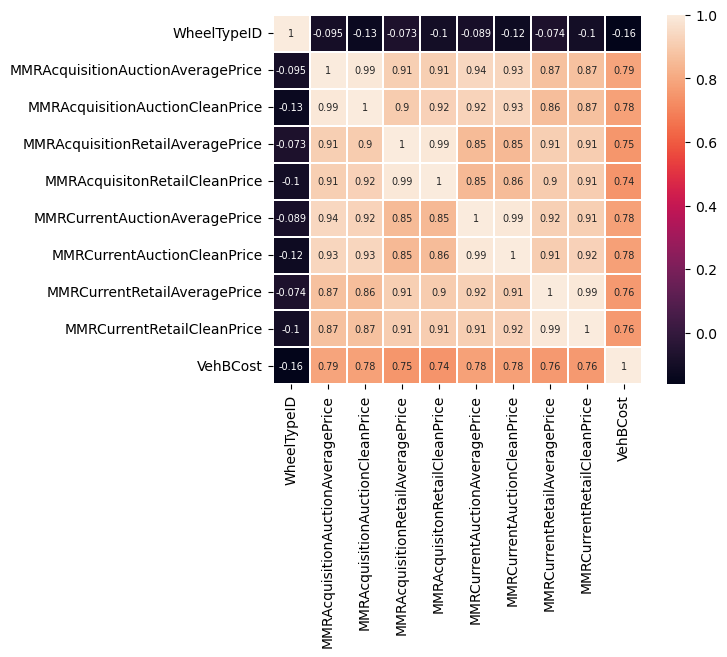

In [9]:
sns.heatmap(heatmap_float.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, linecolor = "white", annot = True, annot_kws = {"size" : 7})

<AxesSubplot:>

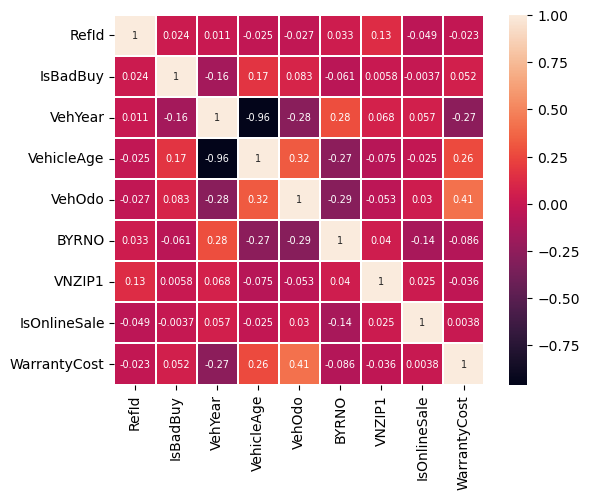

In [10]:
sns.heatmap(heatmap_int.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, linecolor = "white", annot = True, annot_kws = {"size" : 7})

**사용하기로 한 변수**

**RefID: 차량에 할당된 고유한 (순차적) 번호

**IsBadBuy: kick back이 가능한 구매인지를 나타내는 값 (0이면 문제가 없는 구매, 1이면 kick back이 가능한 구매)

**Auction: 차량이 구매된 경매 제공업체

**VehYear: 차량의 제조연도

**Make: 차량 제조사

**Model: 차량 모델

**Trim: 차량 트림 레벨

**VehOdo: 차량의 주행거리


**AveragePrice(아래 항목 평균값)
   MMRAcquisitionAuctionAveragePrice: 구매 시 차량이 평균적인 상태인 경우에 대한 차량 취득가격
   MMRAcquisitionRetailAveragePrice: 구매 시 차량이 평균적인 상태에서 소매 시장에서 판매되는 가격
   MMRCurrentAuctionAveragePrice: 현재 차량이 평균적인 상태인 경우에 대한 차량 취득가격
   MMRCurrentRetailAveragePrice: 현재 차량이 평균적인 상태에서 소매 시장에서 판매되는 가격

**CleanPrice(아래 항목 평균값)
   MMRAcquisitionAuctionCleanPrice: 구매 시 차량이 위 평균적인 상태인 경우에 대한 차량 취득가격   
   MMRAcquisitonRetailCleanPrice: 구매 시 차량이 위 평균적인 상태에서 소매 시장에서 판매되는 가격
   MMRCurrentAuctionCleanPrice: 현재 차량이 위 평균적인 상태인 경우에 대한 차량 취득가격
   MMRCurrentRetailCleanPrice: 현재 해당 차량이 평균 이상의 상태에서 소매 시장에서 인수한 가격

**PRIMEUNIT: 해당 차량이 일반적인 구매보다 더 높은 수요를 가지는지 여부를 나타냄

**AcquisitionType: 해당 차량을 어떻게 인수했는지 나타냄 (경매 구매, 교환 등)

**AUCGUART: 경매에서 제공된 차량의 보증 수준을 나타냄 (녹색 빛 - 보증 가능/중재 가능, 노란색 빛 - 주의/문제 있음, 빨간색 빛 - 그대로 판매)

**KickDate: 차량이 경매로 돌아간 날짜

**VehBCost: 구매 당시 차량의 인수 비용

**IsOnlineSale: 해당 차량이 처음에 온라인으로 구매되었는지 여부를 나타냄

**WarrantyCost: 보증 가격 (기간 = 36개월 및 마일리지 = 36K)

In [11]:
# 새로운 변수값 만들기
train['AveragePrice'] = (train['MMRAcquisitionAuctionAveragePrice'] + train['MMRAcquisitionRetailAveragePrice'] + train['MMRCurrentAuctionAveragePrice'] + train['MMRCurrentRetailAveragePrice'])/4
train['CleanPrice'] = (train['MMRAcquisitionAuctionCleanPrice'] + train['MMRAcquisitonRetailCleanPrice'] + train['MMRCurrentAuctionCleanPrice'] + train['MMRCurrentRetailCleanPrice'])/4

In [12]:
trainset = train[['RefId', 'IsBadBuy','Auction', 'VehYear','Make', 'Model', 'Trim', 'VehOdo', 'AveragePrice', 'CleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1' ,'VNST','VehBCost','IsOnlineSale','WarrantyCost']]

In [13]:
def missing_values_table(df):
        # 총 결측치 값
        mis_val = df.isnull().sum()
        
        # 결측치 비율
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # 결측치 테이블 만들기
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # 열 이름 재정의
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # 결측치 비율로 테이블 내림차순 정렬
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        
        # 요약 정보 프린트
        print ('Your selected dataframe has ' + str(df.shape[1]) + ' columns. \n'
               'There are ' + str(mis_val_table_ren_columns.shape[0]) +
               'columns that have missing values.')
        
        # 결측치 정보를 담은 DataFrame 반환
        return mis_val_table_ren_columns
    
missing_values = missing_values_table(trainset)
missing_values

Your selected dataframe has 18 columns. 
There are 5columns that have missing values.


,Missing Values,% of Total Values
PRIMEUNIT,69564,95.3
AUCGUART,69564,95.3
Trim,2360,3.2
AveragePrice,315,0.4
CleanPrice,315,0.4


PRIMEUNIT, AUCGUART drop

In [14]:
trainset.drop(['PRIMEUNIT', 'AUCGUART'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
trainset.shape

(72983, 16)

In [16]:
trainset_1 = trainset.dropna(axis=0)

In [17]:
trainset_1.shape

(70310, 16)

In [18]:
trainset['Trim'].unique()

array(['i', 'ST', 'SXT', 'ZX3', 'ES', 'EX', 'SE', 'SEL', 'SLE', 'XL',
       'Bas', 'LS', nan, 'SS', 'SLT', '150', 'Spo', 'LX', 'GLS', 'CE',
       'GT', 'Lar', '2', 'Adv', 'SR5', 'GXP', 'Tou', 'XLT', 'LT', 'SES',
       'XLS', 'GL', 'LE', '1', 'L20', 'Lim', 's', 'Edd', '3', 'Edg',
       'ZTW', 'ZX4', 'STX', 'CX', 'Nor', 'GS', 'XE', 'CXL', 'Ren', 'LTZ',
       'ZTS', 'S', 'GTC', 'GTP', 'Cla', 'Spy', 'LXi', 'SE-', 'Exe', 'Pre',
       'SL2', 'GXE', 'SL1', 'Cus', 'GLE', 'DE', 'Z71', 'Si', 'X', 'SX',
       'XR', 'SVT', 'GTS', 'LW3', 'SV6', 'Val', 'Car', 'eL', 'DX', 'Spe',
       'W/T', 'LW2', 'Pro', 'SL', 'L30', 'RT', 'CXS', 'VP', 'Cin', 'Max',
       'Ral', 'Sta', 'Lux', 'R/T', 'Her', 'ZX5', 'Xsp', 'Kin', '3 R',
       'Hig', 'GX', 'EX-', 'RS', 'Plu', 'Ult', 'DS', 'Ove', 'Den', 'XRS',
       'SC2', 'Sig', 'SC1', 'XS', 'C', 'ZX2', 'ZXW', 'ZR2', 'Dur', 'OZ',
       'L', '250', 'eC', 'FX4', 'Out', 'L10', 'Maz', 'Ent', 'T5', 'Z24',
       'Har', 'LL', 'Hyb', 'JLX', 'JLS', 'L 3'], dtype=obj

In [19]:
trainset['Auction'] = trainset['Auction'].replace({'ADESA':1, 'MANHEIM':2, 'OTHER':3})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
# Trim, Auction, Model, Make, VNST 없는 것
trainset_drop1 = trainset.drop(['Trim', 'Model', 'Make', 'VNST' ], axis=1)

In [21]:
trainset_drop1.shape

(72983, 12)

In [22]:
trainset_drop1.dtypes.value_counts()

int64      9
float64    3
dtype: int64

In [23]:
trainset_notTrim.info()

NameError: name 'trainset_notTrim' is not defined

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(trainset_drop1)
trainset_2 = imputer.transform(trainset_drop1)

In [ ]:
trainset['Auction'].unique()

In [ ]:
trainset_drop1.info()

In [ ]:
# 라벨 인코딩
def label_incode(trainset):
    le = LabelEncoder()
    le_count = 0

    for col in trainset:
        if trainset[col].dtype == 'object':
            # 2개 이하의 범주형 변수
            if len(list(trainset[col].unique())) <= 2:
                le.fit(trainset[col])  # fit() : 데이터를 학습시키는 메서드
                trainset[col] = le.transform(trainset[col])  # transform : 실제로 학습시킨 것을 적용하는 메서드
                # fit_transform을 이용하여 코드를 간략화할 수도 있음
                # 그러나 train과 test데이터에 같은 값으로 encoding을 하고 싶으면 fit과 transform을 따로해야함!

                le_count += 1

    print('%d columns were label encoded.' % le_count)

In [ ]:
# trainset_drop1 + Trim 라벨링한 값
# trainset_drop2 = trainset_drop1 

0415)

trainset = 사용하기로 한 변수들 모음

trainset_1 = 결측치 행 제거

trainset_drop1 = Trim, Model, Make, VNST drop한 것

trainset_drop2 = Model, Make, VNST drop한 것